In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
from scipy import stats

In [2]:
# read file and remove duplicate columns
df = pd.concat([pd.read_csv("csv/data source 1.csv"), pd.read_csv("csv/data source 2.csv")], axis=1)
df = df.loc[:,~df.columns.duplicated()]

In [3]:
# get data of one country
df_country = df.loc[df['Code'] == 'IND']
# df_country = df
X = df_country.drop(['Annual HPI', 'Country', 'Code', 'Year'], axis = 1)
y = df_country['Annual HPI']

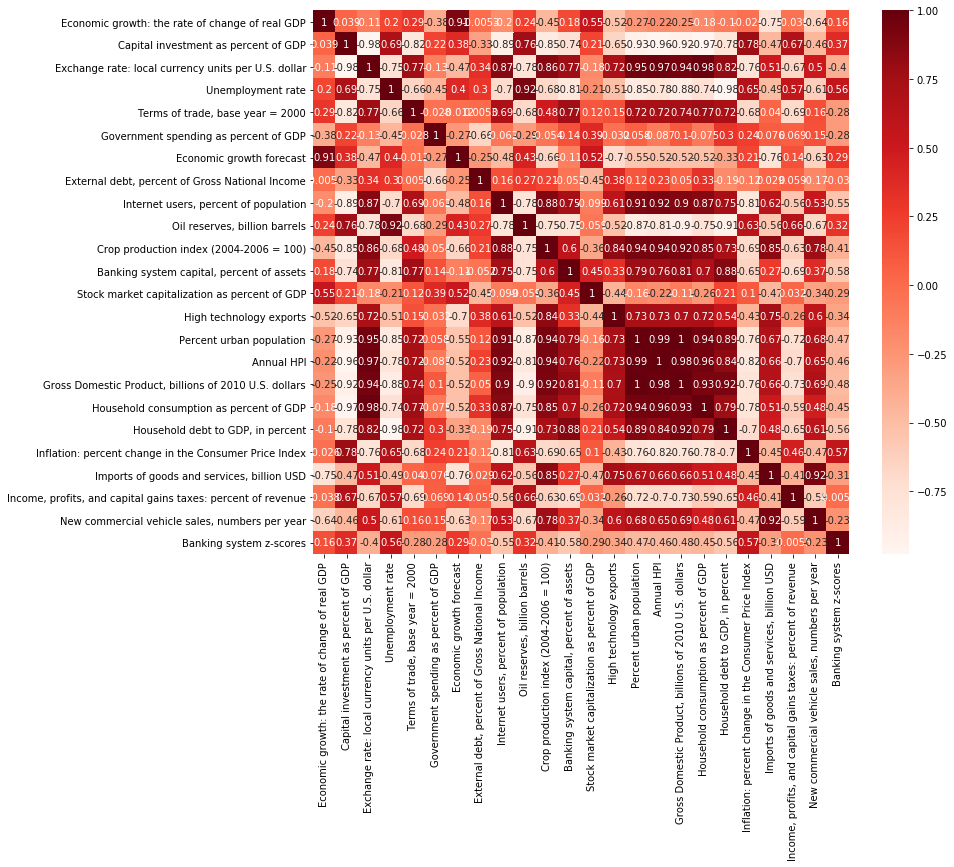

In [4]:
# Using Pearson Correlation to select IV
plt.figure(figsize=(12,10))
cor = df_country.drop(['Country', 'Code', 'Year'], axis = 1).corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()
# plt.savefig('./image/CorrelationTable1.png', dpi=300)

In [5]:
# Columns to remove first
cor['Annual HPI'].loc[abs(cor['Annual HPI'])<=0.5]

Economic growth: the rate of change of real GDP   -0.220589
Government spending as percent of GDP             -0.087368
External debt, percent of Gross National Income    0.231938
Stock market capitalization as percent of GDP     -0.216930
Banking system z-scores                           -0.462106
Name: Annual HPI, dtype: float64

In [6]:
# CHN
# df_remove1 = df_country.drop(['Country', 'Code', 'Year', 
#                               'Exchange rate: local currency units per U.S. dollar', 
#                               'Terms of trade, base year = 2000', 
#                               'External debt, percent of Gross National Income',
#                               'Stock market capitalization as percent of GDP',
#                               'Inflation: percent change in the Consumer Price Index'], axis = 1)

# JPN
# df_remove1 = df_country.drop(['Country', 'Code', 'Year', 
#                               'Exchange rate: local currency units per U.S. dollar', 
#                               'Terms of trade, base year = 2000', 
#                               'External debt, percent of Gross National Income',
#                               'Stock market capitalization as percent of GDP',
#                               'Inflation: percent change in the Consumer Price Index',
#                               'Economic growth: the rate of change of real GDP',
#                               'Government spending as percent of GDP',
#                               'Economic growth forecast',
#                               'Oil reserves, billion barrels',
#                               'Imports of goods and services, billion USD',
#                               'Income, profits, and capital gains taxes: percent of revenue'], axis = 1)

# IND
# df_remove1 = df_country.drop(['Country', 'Code', 'Year', 
#                               'Exchange rate: local currency units per U.S. dollar', 
#                               'Terms of trade, base year = 2000', 
#                               'External debt, percent of Gross National Income',
#                               'Stock market capitalization as percent of GDP',
#                               'Inflation: percent change in the Consumer Price Index',
#                               'Economic growth: the rate of change of real GDP',
#                               'Government spending as percent of GDP',
#                               'Economic growth forecast',
#                               'Oil reserves, billion barrels',
#                               'Imports of goods and services, billion USD',
#                               'Income, profits, and capital gains taxes: percent of revenue',
#                               'Banking system z-scores'], axis = 1)

# PHL
df_remove1 = df_country.drop(['Country', 'Code', 'Year', 
                              'Exchange rate: local currency units per U.S. dollar', 
                              'Terms of trade, base year = 2000', 
                              'External debt, percent of Gross National Income',
                              'Stock market capitalization as percent of GDP',
                              'Inflation: percent change in the Consumer Price Index',
                              'Economic growth: the rate of change of real GDP',
                              'Economic growth forecast',
                              'Oil reserves, billion barrels',
                              'Imports of goods and services, billion USD',
                              'Income, profits, and capital gains taxes: percent of revenue',
                              'Banking system z-scores', 
                              'Crop production index (2004-2006 = 100)',
                              'Banking system capital, percent of assets', 
                              'Household consumption as percent of GDP', 
                              'Household debt to GDP, in percent'], axis = 1)

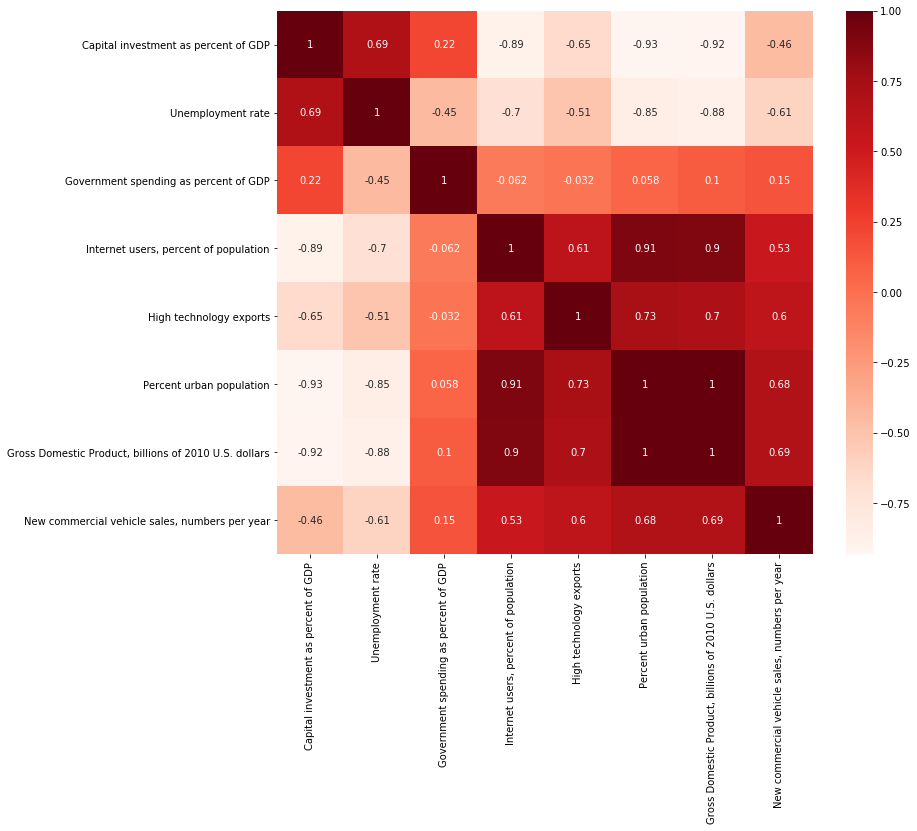

In [7]:
cor1 = df_remove1.drop(['Annual HPI'], axis = 1).corr()
plt.figure(figsize=(12,10))
sns.heatmap(cor1, annot=True, cmap=plt.cm.Reds)
plt.show()
# plt.savefig('./image/CorrelationTable2.png', dpi=300)

In [8]:
# From the above graph we know that most of the variables are highly correlated.
# We choose unemployment rate and 
# 'New commercial vehicle sales, numbers per year'
# As those two variables are least correlated.
df_remove2 = df_country[['Country', 'Code', 'Year', 
                         'Unemployment rate',
#                          'New commercial vehicle sales, numbers per year',
                         'Government spending as percent of GDP',
                         'Annual HPI']]
X = df_remove2.iloc[:,3:-1]
y = df_remove2['Annual HPI']

In [9]:
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
# model.resid
predictions = model.predict(X)
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             Annual HPI   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     22.82
Date:                Fri, 30 Oct 2020   Prob (F-statistic):           0.000495
Time:                        23:00:05   Log-Likelihood:                -51.648
No. Observations:                  11   AIC:                             109.3
Df Residuals:                       8   BIC:                             110.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

/Users/tiankai/miniconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))


In [12]:
model.resid

11   -44.943750
12   -24.420227
13     8.569102
14    15.086905
15    12.888485
16    18.337616
17    13.811837
18   -13.060826
19   -13.903620
20   -27.144027
21    54.778504
dtype: float64

In [10]:
stats.shapiro(model.resid)

(0.9509153962135315, 0.655670702457428)

In [11]:
stats.kstest(model.resid, 'norm')

KstestResult(statistic=0.5454545454545454, pvalue=0.0013494428782933796)